# Assignment-1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
accidents_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/US_Accidents_March23.csv')

1. How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?

In [4]:
categorical_cols = ['City', 'State', 'Weather_Condition']

for col in categorical_cols:
    unique_count = accidents_df[col].nunique()
    most_frequent = accidents_df[col].mode()[0]
    print(f"Column: {col}")
    print(f"Number of unique values: {unique_count}")
    print(f"Most frequent category: {most_frequent}")
    print("-" * 30)

Column: City
Number of unique values: 13678
Most frequent category: Miami
------------------------------
Column: State
Number of unique values: 49
Most frequent category: CA
------------------------------
Column: Weather_Condition
Number of unique values: 144
Most frequent category: Fair
------------------------------


2.Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [12]:

missing_percentage = (accidents_df.isnull().sum() / len(accidents_df)) * 100

columns_with_high_missing = missing_percentage[missing_percentage > 5].sort_values(ascending=False)

print(columns_with_high_missing)


End_Lat              44.029355
End_Lng              44.029355
Precipitation(in)    28.512858
Wind_Chill(F)        25.865904
Wind_Speed(mph)       7.391355
dtype: float64


3.Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [13]:

accidents_df["Start_Time"] = pd.to_datetime(accidents_df["Start_Time"], errors="coerce")
accidents_df["End_Time"]   = pd.to_datetime(accidents_df["End_Time"],   errors="coerce")

earliest = accidents_df["Start_Time"].min()
latest   = accidents_df["Start_Time"].max()

print("Earliest accident start time :", earliest)
print("Latest accident start time   :", latest)

Earliest accident start time : 2016-01-14 20:18:33
Latest accident start time   : 2023-03-31 23:30:00


4.Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?

In [30]:
duplicate_rows = accidents_df.duplicated()
num_duplicates = duplicate_rows.sum()
print("Duplicate records:")
print(duplicate_rows)
if num_duplicates >0:
    print("\nExample duplicate rows:\n", accidents_df[accidents_df.duplicated()].head(10))
df = accidents_df.drop_duplicates()
print(f"Number of duplicate records: {num_duplicates}")

Duplicate records:
0          False
1          False
2          False
3          False
4          False
           ...  
7728389    False
7728390    False
7728391    False
7728392    False
7728393    False
Length: 7728394, dtype: bool
Number of duplicate records: 0


5.Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Accident Severity Distribution (Count):

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64
Accident Severity Distribution (%):

Severity
2    79.667017
3    16.812510
4     2.648804
1     0.871669
Name: count, dtype: float64


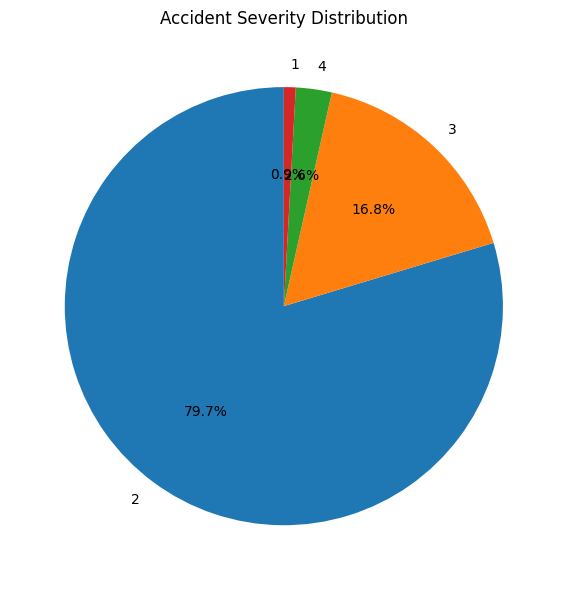

In [18]:
severity_counts = accidents_df["Severity"].value_counts(dropna=False)
severity_percent = severity_counts / len(accidents_df) * 100
print("Accident Severity Distribution (Count):\n")
print(severity_counts)
print("Accident Severity Distribution (%):\n")
print(severity_percent)
plt.figure(figsize=(6,6))
plt.pie(
    severity_percent,
    labels=severity_percent.index,
    autopct="%.1f%%",
    startangle=90
)
plt.title("Accident Severity Distribution")
plt.tight_layout()
plt.show()